--- Starting Score Comparison Plotting ---

Processing table: all_cells_ifng_vs_AAV_control_donor_all_response_scanpy_scores.csv
  Generating plots for score: ifng_response_score_z


/tmp/ipykernel_88202/608976615.py:157: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_stats = plot_data.groupby([genotype_col, condition_col]).agg(
/tmp/ipykernel_88202/608976615.py:176: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_pbs, x=genotype_col, y=score_col, ax=ax1, order=selected_genotypes_ordered, palette='viridis')
/tmp/ipykernel_88202/608976615.py:193: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_ifng, x=genotype_col, y=score_col, ax=ax2, order=selected_genot

  Saving figure to: analysis_results_v9/score_comparison_plots/scanpy_and_anders_ifng_score_top100_ifng_response_score_z_BoxBar_Comparison.svg


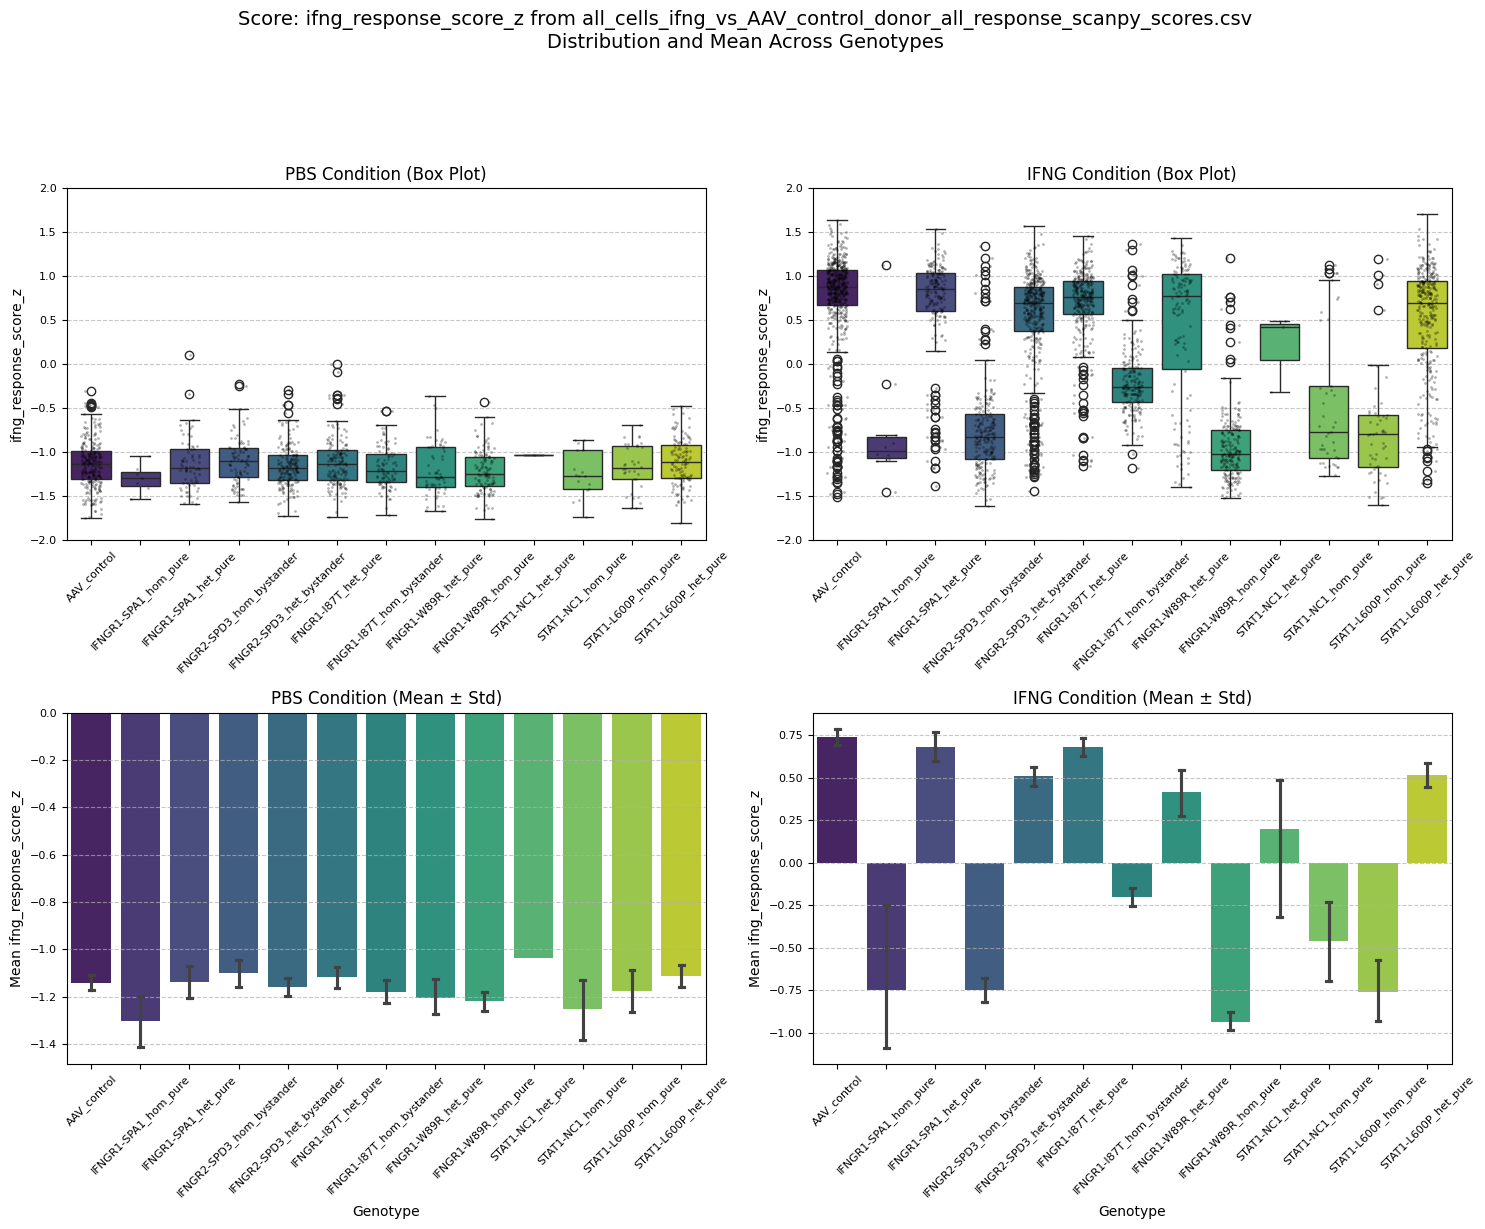


--- All Score Comparison Plots Generated ---


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# --- Configuration ---

# 1. Paths to your input score tables (CSV files)
input_table_paths = [
    '/mnt/data/project/25_04_29_Figure3_reanalysis/src/analysis_results_v9/scanpy_and_anders_ifng_score_top100/all_cells_ifng_vs_AAV_control_donor_all_response_scanpy_scores.csv',
]

# 2. List of score column names within those tables that you want to plot
score_columns_to_plot = [
    # 'ifng_response_score_raw',
    'ifng_response_score_z',
    #'ifng_response_score_stim_group',
    #'ifng_response_score_control_group',
    # 'ifng_response_score_anders',
]

# 3. Common column names in your score tables
genotype_col = 'genotype_annotation'
condition_col = 'condition'
cell_barcode_col = 'cell_barcode' # Assuming this is a column, if index, ignore this

# 4. Condition labels
control_condition_label = 'PBS'
stimulated_condition_label = 'IFNG'

# 5. Selected genotypes to include in the plots
# selected_genotypes = [
#     'AAV_control',
#     'IFNGR1-SPA1_hom_pure',
#     'IFNGR1-SPA1_het_pure',
#     'IFNGR2-SPD3_het_pure',
#     'IFNGR2-SPD3_hom_pure',
#     'JAK1-SPA5_hom_pure',
#     'JAK1-SPA5_hom_pure',
#     'STAT1-L600P_het_pure',
#     'STAT1-L600P_hom_pure',
#     'STAT1-NC1_het_pure',
#     'STAT1-NC1_hom_pure',
#     'STAT1-C324R_hom_pure'
# ]
selected_genotypes = [
    'AAV_control',
    'IFNGR1-SPA1_hom_pure',
    'IFNGR1-SPA1_het_pure',
    'IFNGR2-SPD3_hom_bystander',
    'IFNGR2-SPD3_het_bystander',
    'IFNGR1-I87T_het_pure',
    'IFNGR1-I87T_hom_bystander',
    'IFNGR1-W89R_het_pure',
    'IFNGR1-W89R_hom_pure',
    'STAT1-NC1_het_pure',
    'STAT1-NC1_hom_pure',
    'STAT1-L600P_hom_pure',
    'STAT1-L600P_het_pure',
    'STAT1-NC1_het_pure',
    'STAT1-NC1_hom_pure'
    ]
#score_df_raw = pd.read_csv(input_table_paths[0])
#selected_genotypes = ["AAV_control"] + [i for i in list(score_df_raw['genotype_annotation'].unique()) if i!="AAV_control"]
# import pdb; pdb.set_trace()
# Ensure AAV_control is always first for consistent ordering if desired
selected_genotypes_ordered = [g for g in selected_genotypes if g == 'AAV_control'] + \
                             [g for g in selected_genotypes if g != 'AAV_control']
selected_genotypes_ordered = list(dict.fromkeys(selected_genotypes_ordered)) # Remove duplicates while preserving order

# 6. Output directory for all plots
output_base_dir = Path('./analysis_results_v9/score_comparison_plots')
output_base_dir.mkdir(parents=True, exist_ok=True)

# 7. Plotting parameters
figsize_per_figure = (15, 12) # Size of the 2x2 figure
plot_title_fontsize = 14
axis_label_fontsize = 10
tick_label_fontsize = 8
legend_fontsize = 8
min_cells_for_plot = 2 # Min cells for a group to appear in plot

# --- Main Plotting Loop ---
print("--- Starting Score Comparison Plotting ---")

for table_path_str in input_table_paths:
    table_path = Path(table_path_str)
    
    if not table_path.is_file():
        print(f"\nError: Input table file not found: {table_path}. Skipping.")
        continue
    
    print(f"\nProcessing table: {table_path.name}")
    try:
        score_df_raw = pd.read_csv(table_path)
        # If 'cell_barcode_col' is the index, reset it to a column
        if score_df_raw.index.name == cell_barcode_col:
            score_df = score_df_raw.reset_index().copy()
        elif cell_barcode_col in score_df_raw.columns and score_df_raw.index.name != cell_barcode_col:
            # If cell_barcode is a column and index is unnamed, assume index is just row number
            score_df = score_df_raw.copy()
        elif cell_barcode_col not in score_df_raw.columns and score_df_raw.index.name is None:
             # Assume first column is cell_barcode if no index name and no 'cell_barcode_col'
             score_df = score_df_raw.copy()
             score_df.index.name = 'cell_barcode'
             score_df = score_df.reset_index().copy()
        else:
             score_df = score_df_raw.copy()


        # Filter to selected genotypes
        score_df_filtered = score_df[score_df[genotype_col].isin(selected_genotypes_ordered)].copy()
        
        if score_df_filtered.empty:
            print(f"  No data for selected genotypes in {table_path.name}. Skipping.")
            continue

        # Ensure genotype and condition columns are categorical for plotting order
        score_df_filtered[genotype_col] = score_df_filtered[genotype_col].astype('category')
        score_df_filtered[genotype_col] = score_df_filtered[genotype_col].cat.set_categories(
            [g for g in selected_genotypes_ordered if g in score_df_filtered[genotype_col].unique()], ordered=True
        )
        score_df_filtered[condition_col] = score_df_filtered[condition_col].astype('category')
        score_df_filtered[condition_col] = score_df_filtered[condition_col].cat.set_categories(
            [control_condition_label, stimulated_condition_label], ordered=True
        )


    except Exception as e:
        print(f"  Error loading or filtering {table_path.name}: {e}. Skipping.")
        continue

    for score_col in score_columns_to_plot:
        if score_col not in score_df_filtered.columns:
            print(f"  Score column '{score_col}' not found in {table_path.name}. Skipping.")
            continue
        
        # Drop rows with NaN scores for this column before plotting
        plot_data = score_df_filtered.dropna(subset=[score_col]).copy()
        
        if plot_data.empty:
            print(f"  No non-NaN data for score '{score_col}' in {table_path.name}. Skipping plots.")
            continue

        print(f"  Generating plots for score: {score_col}")

        # --- Prepare Aggregated Data for Bar Plots ---
        # Calculate mean, std, and count per genotype-condition group
        # Corrected syntax for .agg() to avoid TypeError
        aggregated_stats = plot_data.groupby([genotype_col, condition_col]).agg(
            mean=(score_col, 'mean'), # Apply 'mean' to score_col
            std=(score_col, lambda x: x.std() if len(x) >= min_cells_for_plot else 0), # Apply std to score_col
            n_cells=(score_col, 'size') # Apply 'size' to score_col
        ).reset_index()

        # Handle groups with insufficient cells for plotting bar (e.g., set mean to NaN, std to 0)
        aggregated_stats.loc[aggregated_stats['n_cells'] < min_cells_for_plot, ['mean', 'std']] = np.nan


        # Create the 2x2 figure
        fig, axes = plt.subplots(2, 2, figsize=figsize_per_figure)
        fig.suptitle(f"Score: {score_col} from {table_path.name}\nDistribution and Mean Across Genotypes", 
                     fontsize=plot_title_fontsize, y=1.02)
        
        # --- Plot 1: PBS Box Plot ---
        ax1 = axes[0, 0]
        data_pbs = plot_data[plot_data[condition_col] == control_condition_label]
        if not data_pbs.empty:
            sns.boxplot(data=data_pbs, x=genotype_col, y=score_col, ax=ax1, order=selected_genotypes_ordered, palette='viridis')
            sns.stripplot(data=data_pbs, x=genotype_col, y=score_col, ax=ax1, order=selected_genotypes_ordered, color='black', size=2, alpha=0.3, jitter=0.2)
        else:
            ax1.text(0.5, 0.5, "No PBS data", ha='center', va='center', transform=ax1.transAxes)
        ax1.set_title(f'{control_condition_label} Condition (Box Plot)', fontsize=plot_title_fontsize - 2)
        ax1.set_xlabel('')
        ax1.set_ylabel(score_col, fontsize=axis_label_fontsize)
        ax1.set_ylim(-2,2)
        ax1.tick_params(axis='x', rotation=45, labelsize=tick_label_fontsize)
        ax1.tick_params(axis='y', labelsize=tick_label_fontsize)
        ax1.grid(axis='y', linestyle='--', alpha=0.7)


        # --- Plot 2: IFNG Box Plot ---
        ax2 = axes[0, 1]
        data_ifng = plot_data[plot_data[condition_col] == stimulated_condition_label]
        if not data_ifng.empty:
            sns.boxplot(data=data_ifng, x=genotype_col, y=score_col, ax=ax2, order=selected_genotypes_ordered, palette='viridis')
            sns.stripplot(data=data_ifng, x=genotype_col, y=score_col, ax=ax2, order=selected_genotypes_ordered, color='black', size=2, alpha=0.3, jitter=0.2)
        else:
            ax2.text(0.5, 0.5, "No IFNG data", ha='center', va='center', transform=ax2.transAxes)
        ax2.set_title(f'{stimulated_condition_label} Condition (Box Plot)', fontsize=plot_title_fontsize - 2)
        ax2.set_xlabel('')
        ax2.set_ylabel(score_col, fontsize=axis_label_fontsize)
        ax2.tick_params(axis='x', rotation=45, labelsize=tick_label_fontsize)
        ax2.tick_params(axis='y', labelsize=tick_label_fontsize)
        ax2.set_ylim(-2,2)
        ax2.grid(axis='y', linestyle='--', alpha=0.7)


        # --- Plot 3: PBS Bar Plot (Mean +/- Std) ---
        # import pdb; pdb.set_trace()
        ax3 = axes[1, 0]
        data_pbs = plot_data[plot_data[condition_col] == control_condition_label]
        agg_data_pbs = aggregated_stats[aggregated_stats[condition_col] == control_condition_label]
        if not agg_data_pbs.empty and agg_data_pbs['mean'].dropna().any():
            sns.barplot(data=data_pbs, x=genotype_col, y=score_col,  ax=ax3, order=selected_genotypes_ordered, palette='viridis', capsize=0.1)
        else:
            ax3.text(0.5, 0.5, "No PBS data for mean/std", ha='center', va='center', transform=ax3.transAxes)
        ax3.set_title(f'{control_condition_label} Condition (Mean ± Std)', fontsize=plot_title_fontsize - 2)
        ax3.set_xlabel('Genotype', fontsize=axis_label_fontsize)
        ax3.set_ylabel(f'Mean {score_col}', fontsize=axis_label_fontsize)
        ax3.tick_params(axis='x', rotation=45, labelsize=tick_label_fontsize)
        ax3.tick_params(axis='y', labelsize=tick_label_fontsize)
        ax3.grid(axis='y', linestyle='--', alpha=0.7)


        # --- Plot 4: IFNG Bar Plot (Mean +/- Std) ---
        ax4 = axes[1, 1]
        agg_data_ifng = aggregated_stats[aggregated_stats[condition_col] == stimulated_condition_label]
        data_ifng = plot_data[plot_data[condition_col] == stimulated_condition_label]
        if not agg_data_ifng.empty and agg_data_ifng['mean'].dropna().any():
            sns.barplot(data=data_ifng, x=genotype_col, y=score_col, ax=ax4, order=selected_genotypes_ordered, palette='viridis', capsize=0.1)
        else:
            ax4.text(0.5, 0.5, "No IFNG data for mean/std", ha='center', va='center', transform=ax4.transAxes)
        ax4.set_title(f'{stimulated_condition_label} Condition (Mean ± Std)', fontsize=plot_title_fontsize - 2)
        ax4.set_xlabel('Genotype', fontsize=axis_label_fontsize)
        ax4.set_ylabel(f'Mean {score_col}', fontsize=axis_label_fontsize)
        ax4.tick_params(axis='x', rotation=45, labelsize=tick_label_fontsize)
        ax4.tick_params(axis='y', labelsize=tick_label_fontsize)
        ax4.grid(axis='y', linestyle='--', alpha=0.7)
        
        plt.tight_layout(rect=[0, 0, 1, 0.95]) # Adjust rect to prevent suptitle overlap
        
        # Save figure
        
        clean_table_name = str(table_path).split('/')[-2] # Filename without extension
        output_filename = output_base_dir / f"{clean_table_name}_{score_col}_BoxBar_Comparison.svg"
        print(f"  Saving figure to: {output_filename}")
        # plt.savefig(output_filename, dpi=300, bbox_inches='tight')
        plt.show()
        plt.close(fig) # Close the figure to free memory

print("\n--- All Score Comparison Plots Generated ---")